# Reg Number: 24RP04322

In [13]:
import pandas as pd
df = pd.read_csv("BankNote_Authentication.csv")

In [15]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [17]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [20]:
df_scaled

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


In [23]:
x = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df[['class']]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

d_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10,min_samples_split = 5,  random_state=42)
d_tree.fit(x_train, y_train)
y_pred = d_tree.predict(x_test)

In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
accuracy

0.9854545454545455

In [35]:
precision

1.0

In [37]:
recall

0.968503937007874

In [39]:
f1

0.984

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

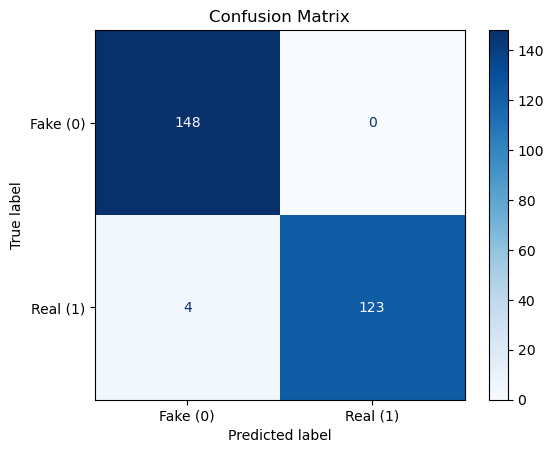

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

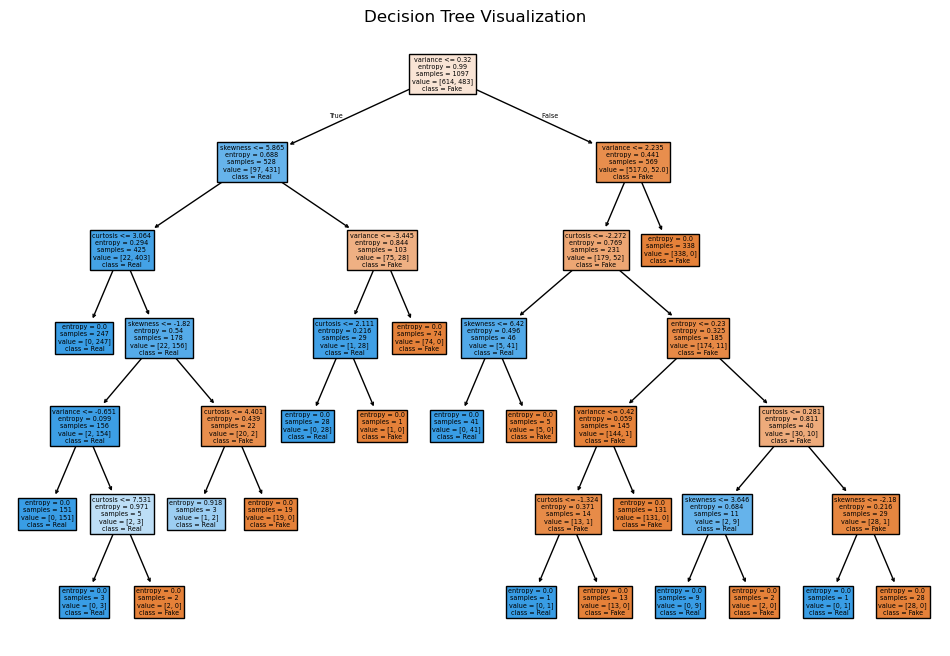

In [45]:
plt.figure(figsize=(12, 8)) 

feature_names = ["variance", "skewness", "curtosis", "entropy"]
class_names = ["Fake", "Real"]

plot_tree(d_tree, feature_names=feature_names, class_names=class_names, filled=True)

plt.title("Decision Tree Visualization")
plt.show()

In [47]:
def predict_banknote(variance, skewness, curtosis, entropy):
    input_data = np.array([[variance, skewness, curtosis, entropy]])
    prediction = d_tree.predict(input_data)  
    return "Real Banknote" if prediction[0] == 1 else "Fake Banknote"

In [49]:
iface = gr.Interface(
    fn=predict_banknote,
    inputs=[
        gr.Number(label="Variance"),
        gr.Number(label="Skewness"),
        gr.Number(label="Curtosis"),
        gr.Number(label="Entropy")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Banknote Authentication System",
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [51]:
import gradio as gr
import numpy as np

iface = gr.Interface(
    fn=predict_banknote,
    inputs=[
        gr.Number(label="Variance"),
        gr.Number(label="Skewness"),
        gr.Number(label="Curtosis"),
        gr.Number(label="Entropy")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Banknote Authentication System",
)
iface.launch()


* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
